# King County Housing Prices Prediction 

### Introduction:

King County, located in the state of Washington, encompasses a diverse range of urban, suburban, and rural communities, including the city of Seattle. The housing market in King County has been characterized by rapid growth, high demand, and escalating prices over the past decade, influenced by factors such as population growth, economic prosperity, and limited housing supply.

The King County Housing Price Prediction Project is an initiative aimed at accurately forecasting housing prices in King County, Washington. This project leverages advanced data analytics and machine learning techniques to provide precise and actionable insights into the factors influencing housing prices in the region. By analyzing historical data and current market trends, we aim to develop a robust predictive model that can assist homebuyers, sellers, real estate agents, and policymakers in making informed decisions.

# Objectives:

1. Determine the key influencing factors for the housing prices in the region.
2. Develop a machine learning model capable of predicting housing prices with high accuracy based on a variety of factors including property features, location, and market conditions.
3. Provide a valuable EDA (Exploratory Data Analysis) for stakeholders such as homebuyers, sellers, real estate professionals, and policymakers to make data-driven decisions regarding property transactions and urban planning.

## Data Understanding

The data set we are using for this project is from Kaggel website. This dataset contains more than 21,000 rows and 21 columns which describe or quantify the different aspects of the housing situation in the region. These features are crucial for achieving the objectives stated above.
We will load the data and check if there are any missing or null values that could impair our analysis. To do this properly we will follow the following steps:

1. Load the dataset.
2. Data cleaning where we will check for missing values and any limitations within the dataset and prepare the dataset.
3. Data exploration where we will clearly identify all the features and select the ones we are willing to work with.
4. Analysis of the data to come up with insights that we can learn about the housing situation in the region
5. Preparing the data for machine learning models to predict the housing prices given different variables.

## 1. Loading the Data

In [125]:
# Start by importing all the necessary libraries fot our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

In [126]:
# Load the actual data

df = pd.read_csv('/Users/madservices/Documents/FlatIron/dsc-data-science-env-config/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv')

# Check the firs 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [127]:
# Statistical summary of the dataset
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here we see that housing price ranges from $78,000.00 to $7,700000.00 with an average being around $540,000.00

In [128]:
# General information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the above codes we learn that the dataset contains 21597 rows (entries) and 21 columns. The data type of the columns include integers, strings, and float numbers.

## 2. Data Cleaning

In [129]:
# Check for missing values in the dataset
df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As can be seen we have missing values from the "waterfront", "view" and "yr_renovated" columns. We need to check and handle them before we can proceed to EDA.

In [130]:
# Let us start with the waterfront column and see what the unique values are
df['waterfront'].unique()

array([nan,  0.,  1.])

The above code shows that the values for the waterfront column are 0 and 1 which means if a house has a waterfront its value is 1 otherwise it is 0. With this understanding we will fill the nan values with 0s.

In [131]:
# Filling the nan values with 0
df['waterfront'].fillna(0, inplace=True)

# Changing the datatype to integer from float
df['waterfront'] = df['waterfront'].astype('int')

# Checking the changes we made
df['waterfront'].unique()

# Now the waterfront column has no missing values and all the values are either 0 or 1.

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_32378/1740310483.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waterfront'].fillna(0, inplace=True)


array([0, 1])

In [132]:
# Let us do the same chaeck with the view column
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

According to the column description above the view column shows how many times a house has been viewed before. Based on this the nan values can be anything between 0 and 4 which is the highest value in the column. Therefore it is possible to fill the nan values with with the median value.

In [133]:
# Calculating the median value of the view column
median_value_view = df['view'].median()

# Replacing the nan value with the median value
df['view'].fillna(median_value_view, inplace=True)

# Checking the changes we made
df['view'].unique()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_32378/1904015202.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['view'].fillna(median_value_view, inplace=True)


array([0., 3., 4., 2., 1.])

In [134]:
# Checking the sqft_basement column
df['sqft_basement'].value_counts()


sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 304, dtype: int64

This column gives the total basement size in sqft. It is a common knowledge that not all the houses have basement. The ones that have no basement are assigned a value 0. The "?" indicates that it is not certain whether the house has basement or not so we will treat it as if it doesn't have. This column contains a non-numeric value and has a string data type. We need to fix this.

In [135]:
# Changing the sqft_basement data type to numeric
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')


# Replacing the non_numeric value with the median value
df['sqft_basement'].fillna(0, inplace = True)

# Checking the changes on sqft_basement column
df['sqft_basement'].isnull().sum()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_32378/382070186.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sqft_basement'].fillna(0, inplace = True)


0

From the data observation above we can see that one house has 33 bedrooms. This eventhough it can be, doesn't seem to be right and needs further investigation.

In [136]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Let us pull all the data for this house and check

In [137]:
# Let's see closely at the 33 bedrooms entry and investigate
df[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [138]:
# Let's see closely at the 10 bedrooms entry and compare
df[df["bedrooms"]==10].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.000000e+00,3.000000e+00,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000
mean,5.001934e+09,8.200000e+05,10.0,3.416667,3706.666667,8859.666667,1.666667,0.0,0.666667,3.666667,7.666667,2456.666667,1250.000000,1959.666667,0.0,98038.333333,47.606700,-122.202667,2193.333333,8686.333333
std,4.121612e+09,2.858321e+05,0.0,1.664582,839.186114,4457.226754,0.577350,0.0,1.154701,0.577350,1.154701,576.223336,762.954782,47.521925,0.0,57.743687,0.049805,0.106237,478.783180,4345.760041
min,6.273001e+08,6.500000e+05,10.0,2.000000,2920.000000,3745.000000,1.000000,0.0,0.000000,3.000000,7.000000,1860.000000,600.000000,1913.000000,0.0,98004.000000,47.570500,-122.320000,1810.000000,3745.000000
25%,3.096700e+09,6.550000e+05,10.0,2.500000,3265.000000,7332.500000,1.500000,0.0,0.000000,3.500000,7.000000,2180.000000,830.000000,1935.500000,0.0,98005.000000,47.578300,-122.247500,1925.000000,7072.500000
50%,5.566100e+09,6.600000e+05,10.0,3.000000,3610.000000,10920.000000,2.000000,0.0,0.000000,4.000000,7.000000,2500.000000,1060.000000,1958.000000,0.0,98006.000000,47.586100,-122.175000,2040.000000,10400.000000
75%,7.189251e+09,9.050000e+05,10.0,4.125000,4100.000000,11417.000000,2.000000,0.0,1.000000,4.000000,8.000000,2755.000000,1575.000000,1983.000000,0.0,98055.500000,47.624800,-122.144000,2385.000000,11157.000000
max,8.812401e+09,1.150000e+06,10.0,5.250000,4590.000000,11914.000000,2.000000,0.0,2.000000,4.000000,9.000000,3010.000000,2090.000000,2008.000000,0.0,98105.000000,47.663500,-122.113000,2730.000000,11914.000000


Now if we check carefully the average price for a 10 bedroom house is $820,000.00 while the price for the 33 bedroom house is $640,000.00. This comparison and even the size of the sqft_living shows that this entry is wrong. So we will drop it off our dataset as it can skew our analysis late on.

In [139]:
# Dropping the entry for the house with 33 bedrooms using its id.
df.drop([15856], axis = 0, inplace=True)

# Checking the modification
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [140]:
# check the year renovated column to learn about the values and decide what to do with the missing ones.
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [141]:
# Since the yr_renovated column describes the year a house was renovated those that are not renovated are assigned a value 0. So we shall fill the nan value with 0.
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# Checking the changes on yr_renovated column


In [142]:
# Let us recheck if our data has any missing or null values
df.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Good now our dataset has no missing or null values. The id, date and zipcode columns in our dataset are not important for this project so we should drop them.

In [143]:
# Dropping the id, date and zipcode columns from our dataset
df.drop(['id', 'date', 'zipcode'], axis = 1, inplace=True)

Let us Remove the outliers from our dataset

In [144]:
# Calculate IQR for selected columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

In [145]:
# droping all columns with outliers 
clean_df = df.drop(outlier_indices)

Let us check for duplicates as well

In [157]:
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Get duplicates
duplicates = get_duplicates(df)
duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
547,259950.0,2,2.00,1070,649,2.0,0,0.0,3,9,720,350.0,2008,0.0,47.5213,-122.357,1070,928
3946,550000.0,4,1.75,2410,8447,2.0,0,3.0,4,8,2060,350.0,1936,1980.0,47.6499,-122.088,2520,14789
3947,550000.0,4,1.75,2410,8447,2.0,0,3.0,4,8,2060,350.0,1936,1980.0,47.6499,-122.088,2520,14789
4348,259950.0,2,2.00,1070,649,2.0,0,0.0,3,9,720,350.0,2008,0.0,47.5213,-122.357,1070,928
14968,585000.0,3,2.50,2290,5089,2.0,0,0.0,3,9,2290,0.0,2001,0.0,47.5443,-122.172,2290,7984
14969,585000.0,3,2.50,2290,5089,2.0,0,0.0,3,9,2290,0.0,2001,0.0,47.5443,-122.172,2290,7984
19620,529500.0,3,2.25,1410,905,3.0,0,0.0,3,9,1410,0.0,2014,0.0,47.5818,-122.402,1510,1352
20037,555000.0,3,2.50,1940,3211,2.0,0,0.0,3,8,1940,0.0,2009,0.0,47.5644,-122.093,1880,3078
20038,555000.0,3,2.50,1940,3211,2.0,0,0.0,3,8,1940,0.0,2009,0.0,47.5644,-122.093,1880,3078
20508,529500.0,3,2.25,1410,905,3.0,0,0.0,3,9,1410,0.0,2014,0.0,47.5818,-122.402,1510,1352


In [155]:
# Check for duplicates
df.duplicated().value_counts()

False    21591
True         5
Name: count, dtype: int64

## 3: Data Exploration

Let us check the columns of our dataset and see which ones we can use for our objectives.

### Objective 1. Determine the key influencing factors for the housing prices in the region.
To do this let us examine how all the features in our dataset are related to the Price column

In [147]:
# Checking the correlation between all the features in our dataset and the house prices
correlation_matrix = df.corr()
correlation_matrix['price'].sort_values(ascending=False)


price            1.000000
sqft_living      0.701929
grade            0.667964
sqft_above       0.605392
sqft_living15    0.585267
bathrooms        0.525915
view             0.393502
sqft_basement    0.321103
bedrooms         0.315961
lat              0.306687
waterfront       0.264308
floors           0.256820
yr_renovated     0.117858
sqft_lot         0.089879
sqft_lot15       0.082849
yr_built         0.053965
condition        0.036031
long             0.022047
Name: price, dtype: float64

As can be seen above, sqft_living, grade, sqft_above, sqft_living15, bathrooms are the top 5 columns highly correlated with the house price. This strong positive correlation indicate that these features have great impact on the house price in King County. While view, sqft_basement, bedrooms, lat, waterfront, floors have moderate positive correlation. The rest of the features have low correlation which means their impact in determining the house price is low. Let us demonstrate this further using plots.

In [148]:
# let us create data frames with these category of features
highly_influencers = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
moderate_influencers = df[['view','sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]
no_influencers = df[['yr_renovated', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long']]

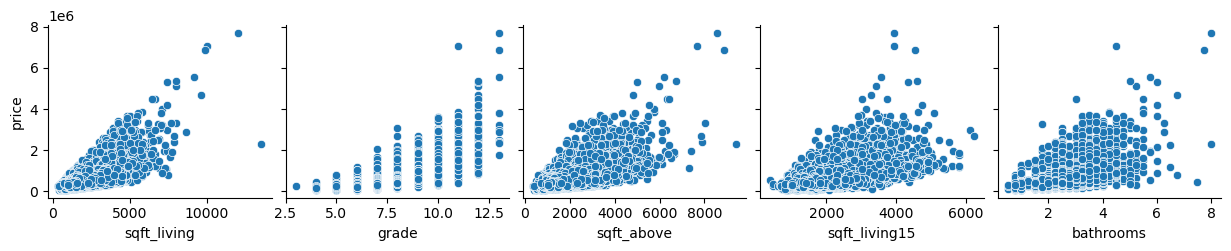

In [149]:
# Pair Plotting features with the house price
sns.pairplot(df, y_vars=['price'], x_vars=highly_influencers.columns)
plt.show()

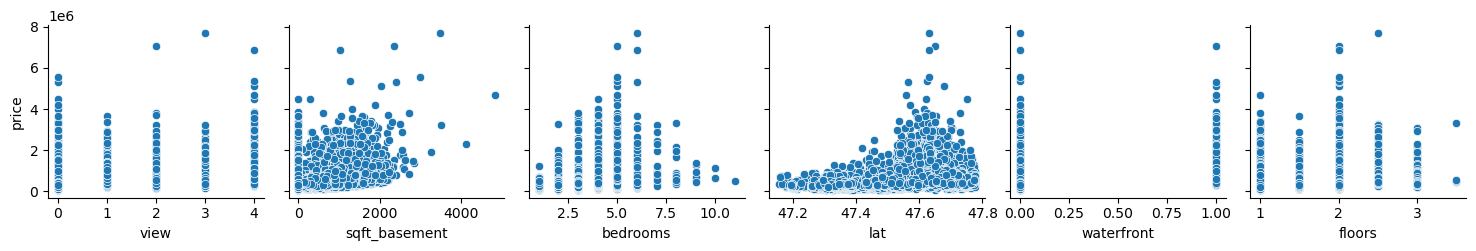

In [150]:
sns.pairplot(df, y_vars=['price'], x_vars=moderate_influencers.columns)
plt.show()

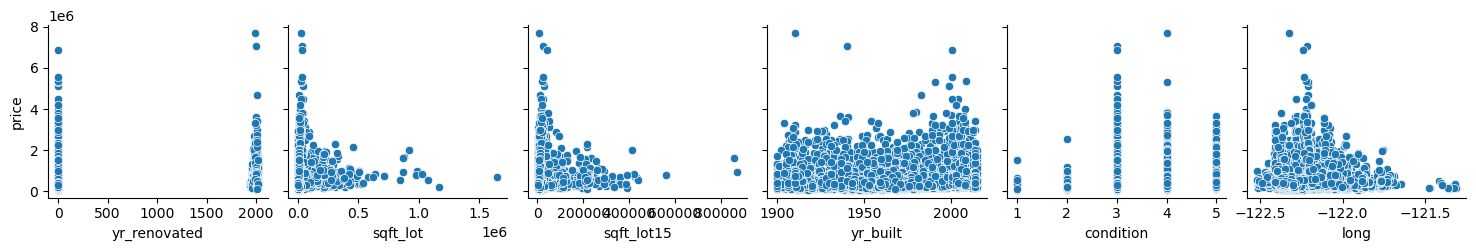

In [151]:
sns.pairplot(df, y_vars=['price'], x_vars=no_influencers.columns)
plt.show()

We can see how the features in our dataset are correlated with the house prices. With this info in mind let us proceed to data analysis.

## 4: Analysis

Since price is our target variable, let us first investigate it.

In [152]:
df.sort_values(['price'], ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
7245,7700000.0,6,8.00,12050,27600,2.5,0,3.0,4,13,8570,3480.0,1910,1987.0,47.6298,-122.323,3940,8800
3910,7060000.0,5,4.50,10040,37325,2.0,1,2.0,3,11,7680,2360.0,1940,2001.0,47.6500,-122.214,3930,25449
9245,6890000.0,6,7.75,9890,31374,2.0,0,4.0,3,13,8860,1030.0,2001,0.0,47.6305,-122.240,4540,42730
4407,5570000.0,5,5.75,9200,35069,2.0,0,0.0,3,13,6200,3000.0,2001,0.0,47.6289,-122.233,3560,24345
1446,5350000.0,5,5.00,8000,23985,2.0,0,4.0,3,12,6720,1280.0,2009,0.0,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0,0.0,2,5,520,0.0,1951,0.0,47.4799,-122.296,1572,10570
8267,82000.0,3,1.00,860,10426,1.0,0,0.0,3,6,860,0.0,1954,0.0,47.4987,-122.341,1140,11250
16184,81000.0,2,1.00,730,9975,1.0,0,0.0,1,5,730,0.0,1943,0.0,47.4808,-122.315,860,9000
465,80000.0,1,0.75,430,5050,1.0,0,0.0,2,4,430,0.0,1912,0.0,47.6499,-121.909,1200,7500


What we see from here is that the price ranges from $78k for 2 bedroom house with 780sqft living space, 1 floor, 1 bathroom to $7.7mil for a 6 bedroom, with 8 bathrooms, 2.5 floors and  12050sqft living space. This is a huge gap and maybe the high price could blow our distribution. Let us investigate it.

/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


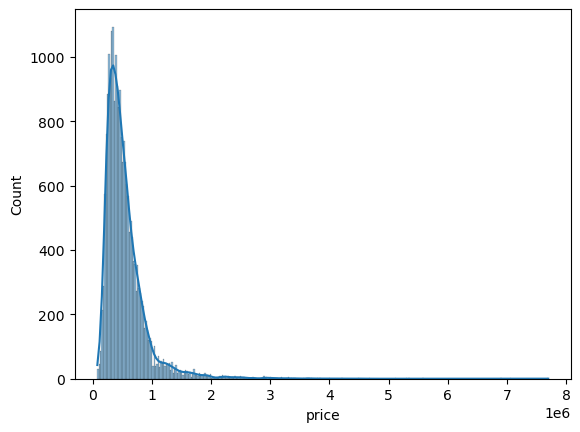

In [153]:
# Plotting the price distribution
sns.histplot(df['price'], kde=True)
plt.show()

# From the histogram above we can see that the price distribution is heavily right-skewed. This means that the majority of the houses in our dataset are priced at lower values.